# KNN with NumPy

#### Nothing to it.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
# create a random set of 10 points on the 2-dimensional plane
X = np.random.rand(10, 2)

In [4]:
X

array([[0.4305961 , 0.02429743],
       [0.74985926, 0.85565687],
       [0.1819661 , 0.98893929],
       [0.44575964, 0.70470386],
       [0.86903704, 0.96435349],
       [0.11644822, 0.76847752],
       [0.91008584, 0.85254173],
       [0.57211846, 0.45928645],
       [0.13735333, 0.61665176],
       [0.36926646, 0.760511  ]])

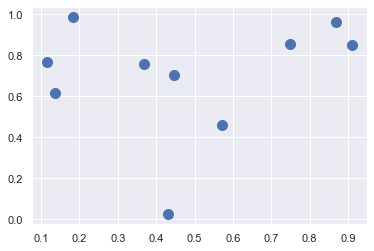

In [7]:
%matplotlib inline
seaborn.set() # plot styling
plt.scatter(X[:, 0], X[:, 1], s = 100)

In [10]:
# compute the pairwise distance between each pair of points
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,]) ** 2, axis=-1)

In [11]:
dist_sq # distance matrix

array([[0.        , 0.79308748, 0.9923508 , 0.46318284, 1.07593585,
        0.65249289, 0.91589902, 0.20924403, 0.43687496, 0.54577174],
       [0.79308748, 0.        , 0.34026686, 0.11526339, 0.0260183 ,
        0.40880979, 0.02568226, 0.1887013 , 0.43228696, 0.15390361],
       [0.9923508 , 0.34026686, 0.        , 0.15037682, 0.47267095,
        0.05289599, 0.54876265, 0.432751  , 0.14058831, 0.08726091],
       [0.46318284, 0.11526339, 0.15037682, 0.        , 0.24658169,
        0.11251309, 0.23745485, 0.07619625, 0.10286762, 0.00896564],
       [1.07593585, 0.0260183 , 0.47267095, 0.24658169, 0.        ,
        0.60475733, 0.01418687, 0.34325335, 0.65625755, 0.29132239],
       [0.65249289, 0.40880979, 0.05289599, 0.11251309, 0.60475733,
        0.        , 0.63692746, 0.30323448, 0.02348809, 0.06398053],
       [0.91589902, 0.02568226, 0.54876265, 0.23745485, 0.01418687,
        0.63692746, 0.        , 0.26887166, 0.6527596 , 0.30095525],
       [0.20924403, 0.1887013 , 0.432751 

In [16]:
nearest = np.argsort(dist_sq, axis = 1)

print(nearest)

[[0 7 8 3 9 5 1 6 2 4]
 [1 6 4 3 9 7 2 5 8 0]
 [2 5 9 8 3 1 7 4 6 0]
 [3 9 7 8 5 1 2 6 4 0]
 [4 6 1 3 9 7 2 5 8 0]
 [5 8 2 9 3 7 1 4 6 0]
 [6 4 1 3 7 9 2 5 8 0]
 [7 3 9 1 0 8 6 5 4 2]
 [8 5 9 3 2 7 1 0 6 4]
 [9 3 5 8 2 7 1 4 6 0]]


In [17]:
K = 3
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

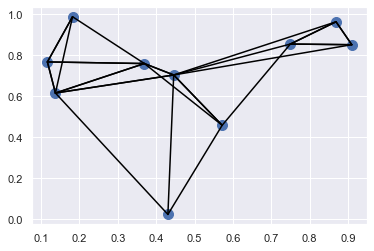

In [18]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its nearest neighbor
K = 3

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen
        plt.plot(*zip(X[j], X[i]), color='black')

This approach is elegant as it is vectorized and efficient.